## LinearSVC with gridsearch

In [1]:
import numpy as np
import random
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
x = np.load('x_npinterp.npy')
y = np.load('y.npy')

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [8]:
pipeline = make_pipeline(StandardScaler(), PCA(), LinearSVC())

#param_grid = {'pca__n_components': np.arange(50,100,5),
#              'linearsvc__C': 10 ** np.linspace(-2,-1,10)}

param_grid = {'C': 10. ** np.linspace(-3,3,10)}

#param_grid = {'pca__n_components': [80],
#              'linearsvc__C': [0.0502]}

gridsearch = GridSearchCV(LinearSVC(),param_grid,verbose=3,cv=2)

In [9]:
gridsearch.fit(x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.670051 -   5.5s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.690832 -   5.7s
[CV] C=0.00464158883361 ..............................................
[CV] ..................... C=0.00464158883361, score=0.777665 -   6.5s
[CV] C=0.00464158883361 ..............................................
[CV] ..................... C=0.00464158883361, score=0.783582 -   6.7s
[CV] C=0.0215443469003 ...............................................
[CV] ...................... C=0.0215443469003, score=0.822335 -   8.6s
[CV] C=0.0215443469003 ...............................................
[CV] ...................... C=0.0215443469003, score=0.834755 -   9.1s
[CV] C=0.1 ...........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.7min finished


GridSearchCV(cv=2,
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   4.64159e-03,   2.15443e-02,   1.00000e-01,
         4.64159e-01,   2.15443e+00,   1.00000e+01,   4.64159e+01,
         2.15443e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=3)

In [10]:
print('The score on the training set is:',gridsearch.score(x_train,y_train).round(3))
print('The score on the testing set is:',gridsearch.score(x_test,y_test).round(3))

The score on the training set is: 1.0
The score on the testing set is: 0.907


<IPython.core.display.Javascript object>


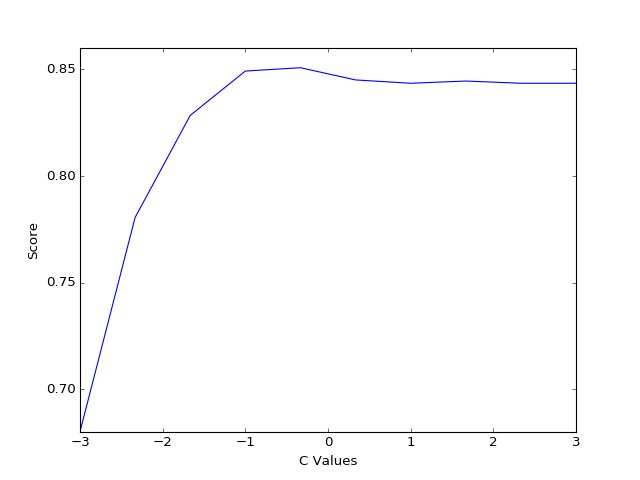

In [29]:
scores = np.array([x[1] for x in gridsearch.grid_scores_])
values = np.log10(np.array([x for x in param_grid.values()]).ravel())

plt.plot(values,scores)
plt.xlabel('C Values')
plt.ylabel('Score')
plt.suptitle('Score vs C parameter',fontsize=16)

In [25]:
np.array([x for x in param_grid.values()]).ravel().shape

(10,)

In [20]:
[x[1] for x in gridsearch.grid_scores_]

[0.68018720748829953,
 0.78055122204888194,
 0.82839313572542905,
 0.84919396775871037,
 0.85075403016120643,
 0.84503380135205408,
 0.84347373894955802,
 0.84451378055122206,
 0.84347373894955802,
 0.84347373894955802]